# Housing Price Prediction using a Neural Network

## Objective
In this exercise, you will:
1. Create a synthetic dataset for housing prices based on a linear equation.
2. Build and train a simple neural network with one neuron to predict housing prices.

---

## Step 1: Import Libraries
Let's start by importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


---

## Step 2: Create a Synthetic Dataset
We will create a dataset for housing prices that follows the equation

$\text{price}$ = $\text{number of bedrooms}$ $\times  x$ + $\text{base price}$


In [2]:
# Number of samples
n_samples = 1000

# Generate random number of bedrooms between 1 and 5
bedrooms = np.random.randint(1, 6, n_samples)

# Constants for the equation
x = 0.5  # The price added per bedroom in onehundred thousands
base_price = 1  # Base price of a house in onehundred thousands

# Generate housing prices based on the equation
prices = bedrooms * x + base_price

# Create a DataFrame
df = pd.DataFrame({'bedrooms': bedrooms, 'price': prices})

# Show the first few rows
df.head()

,bedrooms,price
0,2,2.0
1,5,3.5
2,3,2.5
3,4,3.0
4,2,2.0


---

## Step 3: Visualize the Data
Plot the data to visualize the relationship between the number of bedrooms and the price.


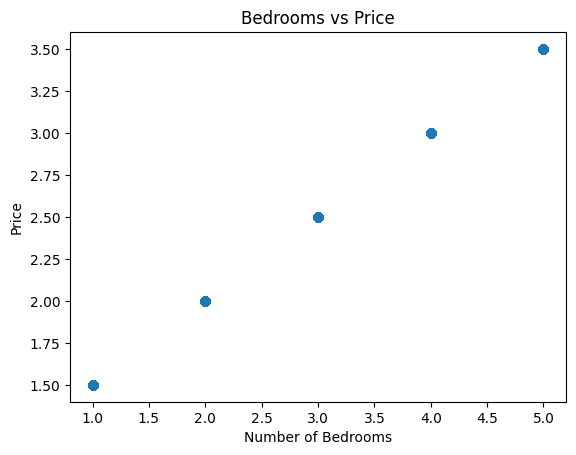

In [3]:
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price')
plt.show()


---

## Step 4: Preprocess the Data
Split the data into features (`X`) and labels (`y`), and then into training and testing sets.


In [7]:
# Features and Labels
X = df[['bedrooms']]
y = df['price']

# TODO Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



---

## Step 5: Build a Neural Network
Build a simple neural network with one neuron to predict the house prices.
Pick an optimizer and a loss function that suits this problem.


In [4]:
# TODO Create the model

model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)), # one input feature
    tf.keras.layers.Dense(units=1) # one neuron
])



# TODO Compile the model
model.compile(
            optimizer="sgd", # Stochastic Gradient Descent
            loss="mse"  # Mean Squared Error
        )


# TODO print a Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

---

## Step 6: Train the Model
Train the model using the training data.


In [8]:
# TODO Train the
model.fit(X_train, y_train, epochs=500) # 500 iterations to find lowest loss value for train set (ie gradient descent)


Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1468
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1133 
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0984
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0786
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0617
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0566
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0450
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0399 
Epoch 9/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0336 
Epoch 10/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0270 
Epoch 11/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0236 
Epoch 12/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0190 
Epoch 13/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0155 
Epoch 14/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0128 
Epoch 15/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

---

## Step 7: Evaluate the Model
Evaluate the model using the test data and plot its prediction.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0489e-12 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


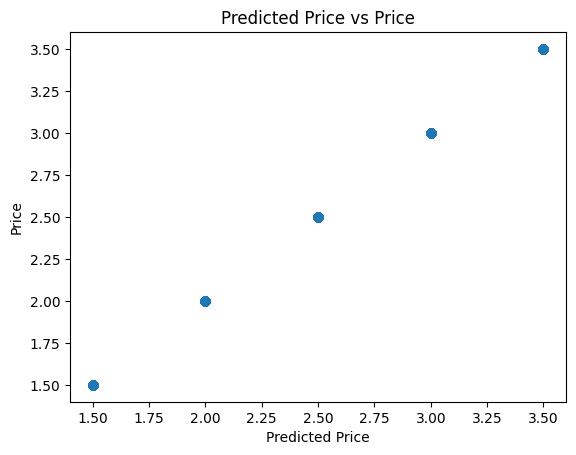

In [11]:
# TODO Evaluate the model using the model.evaluate() function
model.evaluate(X_test, y_test) # returns loss value for test set (v low given the synthetic dataset)

# TODO Make predictions
model.predict(np.array([4, 10, 100, 123]))

# TODO Plot real vs predicted prices (hint: you can use the plotting code from above as a start)
##plot real vs predicted prices
df['pred_price'] = model.predict(np.array(df['bedrooms']))

plt.scatter(df['pred_price'], df['price'])
plt.xlabel('Predicted Price')
plt.ylabel('Price')
plt.title('Predicted Price vs Price')
plt.show()




# Step 8: Optional
Go back to the start and experiment what happens if instead of representing a price of a house costing onehundred thousand by a 1 we use the raw number 100,000 instead.

Try to explain what happened and why.

In [ ]:
# I didn't see any change, other than the scale changed of course (I also changed 0.5 to 50000).